In [1]:
from NIDS import *

In [2]:
nids = NIDS_Manager("UNSW-NB15-BALANCED-TRAIN.csv", "LRCV", "attack_cat")

## Feature Analysis

### Label

Index(['sport', 'dsport', 'sttl', 'Stime', 'Ltime', 'Sintpkt', 'ct_state_ttl'], dtype='object')
1.0


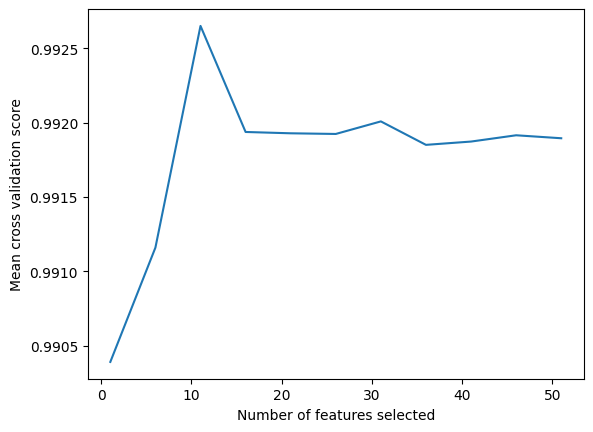

In [3]:
nids.rfecv_fit(nids.x, nids.y_label)
label_selected_features = nids.rfecv_selected_features()
print(label_selected_features)
print(nids.rfecv_score(nids.x, nids.y_label))
nids.rfecv_plot()

### attack_cat

Index(['dsport', 'sbytes', 'dbytes', 'sttl', 'service', 'smeansz', 'dmeansz'], dtype='object')
0.955791879651102


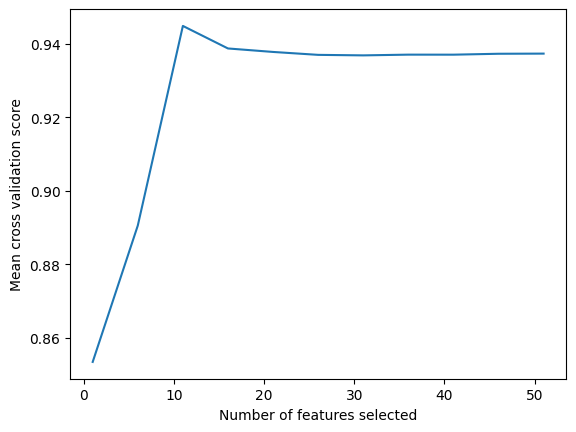

In [4]:
nids.rfecv_fit(nids.x, nids.y_attack_cat)
attack_selected_features = nids.rfecv_selected_features()
print(attack_selected_features)
print(nids.rfecv_score(nids.x, nids.y_attack_cat))
nids.rfecv_plot()

## Classification (Logistic Regression)

### Label

#### With feature selection

In [5]:
log_lab_pred_fs, log_lab_score_fs = nids.run_logistic(nids.rfecv_x_specific_select(nids.x_train, label_selected_features), nids.rfecv_x_specific_select(nids.x_test, label_selected_features), nids.y_train_label, nids.y_test_label)
log_lab_pred_fs, log_lab_score_fs

(array([1, 1, 1, ..., 0, 1, 0]), 0.9892831732479545)

In [6]:
nids.print_class_report(nids.y_test_label, log_lab_pred_fs)

Classifier: Principal Component Analysis (PCA) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     67336
           1       0.98      1.00      0.99     67592

    accuracy                           0.99    134928
   macro avg       0.99      0.99      0.99    134928
weighted avg       0.99      0.99      0.99    134928



#### Without feature selection

In [7]:
log_lab_pred, log_lab_score = nids.run_logistic(nids.x_train, nids.x_test, nids.y_train_label, nids.y_test_label)
log_lab_pred, log_lab_score

(array([1, 1, 1, ..., 0, 1, 0]), 0.9923885331436025)

In [8]:
nids.print_class_report(nids.y_test_label, log_lab_pred)

Classifier: Principal Component Analysis (PCA) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     67336
           1       0.99      1.00      0.99     67592

    accuracy                           0.99    134928
   macro avg       0.99      0.99      0.99    134928
weighted avg       0.99      0.99      0.99    134928



### attack_cat

#### With feature selection

In [10]:
log_atk_pred_fs, log_atk_score_fs = nids.run_logistic(nids.rfecv_x_specific_select(nids.x_train, attack_selected_features), nids.rfecv_x_specific_select(nids.x_test, attack_selected_features), nids.y_train_attack, nids.y_test_attack)
log_atk_pred_fs, log_atk_score_fs

(array(['Generic', 'Generic', 'Generic', ..., 'Exploits', 'Generic', ''],
       dtype=object),
 0.8807734495434603)

In [11]:
nids.print_class_report(nids.y_test_attack, log_atk_pred_fs)

Classifier: Principal Component Analysis (PCA) 

                precision    recall  f1-score   support

                     0.94      0.98      0.96     67336
      Analysis       0.00      0.00      0.00       568
      Backdoor       0.00      0.00      0.00       361
     Backdoors       0.00      0.00      0.00       122
           DoS       0.75      0.00      0.00      3396
      Exploits       0.37      0.52      0.43      9227
       Fuzzers       0.62      0.40      0.48      5053
       Generic       0.99      0.97      0.98     45542
Reconnaissance       0.38      0.42      0.40      2960
     Shellcode       0.55      0.39      0.45       328
         Worms       0.00      0.00      0.00        35

      accuracy                           0.88    134928
     macro avg       0.42      0.33      0.34    134928
  weighted avg       0.88      0.88      0.87    134928



#### Without feature selection

In [12]:
log_atk_pred, log_atk_score = nids.run_logistic(nids.x_train, nids.x_test, nids.y_train_attack, nids.y_test_attack)
log_atk_pred, log_atk_score

(array(['Generic', 'Generic', 'Generic', ..., '', 'Generic', ''],
       dtype=object),
 0.9269758686114076)

In [13]:
nids.print_class_report(nids.y_test_attack, log_atk_pred)

Classifier: Principal Component Analysis (PCA) 

                precision    recall  f1-score   support

                     1.00      0.99      0.99     67336
      Analysis       0.58      0.05      0.09       568
      Backdoor       0.00      0.00      0.00       361
     Backdoors       0.00      0.00      0.00       122
           DoS       0.40      0.07      0.12      3396
      Exploits       0.56      0.85      0.68      9227
       Fuzzers       0.69      0.77      0.73      5053
       Generic       0.99      0.97      0.98     45542
Reconnaissance       0.67      0.72      0.69      2960
     Shellcode       0.76      0.63      0.69       328
         Worms       0.00      0.00      0.00        35

      accuracy                           0.93    134928
     macro avg       0.51      0.46      0.45    134928
  weighted avg       0.93      0.93      0.92    134928



## Support Vector Classification (SVC)

In [15]:
nids.classifier_init('SVC')

0

### Label

In [16]:
svc_label_pred, svc_label_score = nids.run_svc(nids.rfecv_x_specific_select(nids.x_train, label_selected_features), nids.rfecv_x_specific_select(nids.x_test, label_selected_features), nids.y_train_label, nids.y_test_label)
svc_label_pred, svc_label_score

(array([1, 1, 1, ..., 0, 1, 0]), 0.9818347563144788)

In [17]:
nids.print_class_report(nids.y_test_label, svc_label_pred)

Classifier: Principal Component Analysis (PCA) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     67336
           1       0.98      0.98      0.98     67592

    accuracy                           0.98    134928
   macro avg       0.98      0.98      0.98    134928
weighted avg       0.98      0.98      0.98    134928



### attack_cat

In [19]:
svc_atk_pred, svc_atk_score = nids.run_svc(nids.rfecv_x_specific_select(nids.x_train, attack_selected_features), nids.rfecv_x_specific_select(nids.x_test, attack_selected_features), nids.y_train_attack, nids.y_test_attack)
svc_atk_pred, svc_atk_score

(array(['Generic', 'Generic', 'Generic', ..., 'Exploits', 'Generic', ''],
       dtype=object),
 0.8754743270484999)

In [20]:
nids.print_class_report(nids.y_test_attack, svc_atk_pred)

Classifier: Principal Component Analysis (PCA) 

                precision    recall  f1-score   support

                     0.94      0.98      0.96     67336
      Analysis       0.00      0.00      0.00       568
      Backdoor       0.00      0.00      0.00       361
     Backdoors       0.00      0.00      0.00       122
           DoS       0.00      0.00      0.00      3396
      Exploits       0.35      0.47      0.40      9227
       Fuzzers       0.49      0.33      0.40      5053
       Generic       0.99      0.97      0.98     45542
Reconnaissance       0.38      0.40      0.39      2960
     Shellcode       0.53      0.77      0.63       328
         Worms       0.00      0.00      0.00        35

      accuracy                           0.88    134928
     macro avg       0.33      0.36      0.34    134928
  weighted avg       0.85      0.88      0.86    134928

